<a href="https://colab.research.google.com/github/manny-uncharted/Deep-learning-projects/blob/main/Speech_emotion_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q kaggle

In [2]:
# Import kaggle access key
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"manuel14","key":"3b9dfe18c100635bc3acf633996e3786"}'}

In [3]:
!mkdir ~/.kaggle

!cp kaggle.json ~/.kaggle/

In [4]:
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets download -d ejlok1/toronto-emotional-speech-set-tess

 99% 425M/428M [00:13<00:00, 36.1MB/s]
100% 428M/428M [00:13<00:00, 33.0MB/s]


In [6]:
!mkdir dataset

In [7]:
!unzip toronto-emotional-speech-set-tess -d dataset

Streaming output truncated to the last 5000 lines.
  inflating: dataset/TESS Toronto emotional speech set data/OAF_angry/OAF_back_angry.wav  
  inflating: dataset/TESS Toronto emotional speech set data/OAF_angry/OAF_bar_angry.wav  
  inflating: dataset/TESS Toronto emotional speech set data/OAF_angry/OAF_base_angry.wav  
  inflating: dataset/TESS Toronto emotional speech set data/OAF_angry/OAF_bath_angry.wav  
  inflating: dataset/TESS Toronto emotional speech set data/OAF_angry/OAF_bean_angry.wav  
  inflating: dataset/TESS Toronto emotional speech set data/OAF_angry/OAF_beg_angry.wav  
  inflating: dataset/TESS Toronto emotional speech set data/OAF_angry/OAF_bite_angry.wav  
  inflating: dataset/TESS Toronto emotional speech set data/OAF_angry/OAF_boat_angry.wav  
  inflating: dataset/TESS Toronto emotional speech set data/OAF_angry/OAF_bone_angry.wav  
  inflating: dataset/TESS Toronto emotional speech set data/OAF_angry/OAF_book_angry.wav  
  inflating: dataset/TESS Toronto emotion

In [8]:
!pip install librosa

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')

In [37]:
paths = []
labels = []
for dirname, _, filenames in os.walk('/content/dataset/TESS Toronto emotional speech set data'):
  for filename in filenames:
      paths.append(os.path.join(dirname, filename))
      label = filename.split('_')[-1]
      label = label.split('.')[0]
      labels.append(label.lower())
  if len(paths) == 2800:
      break
print('Dataset is Loaded')

Dataset is Loaded


In [38]:
len(paths)

2800

In [39]:
paths[:5]

['/content/dataset/TESS Toronto emotional speech set data/OAF_Pleasant_surprise/OAF_tough_ps.wav',
 '/content/dataset/TESS Toronto emotional speech set data/OAF_Pleasant_surprise/OAF_base_ps.wav',
 '/content/dataset/TESS Toronto emotional speech set data/OAF_Pleasant_surprise/OAF_read_ps.wav',
 '/content/dataset/TESS Toronto emotional speech set data/OAF_Pleasant_surprise/OAF_dead_ps.wav',
 '/content/dataset/TESS Toronto emotional speech set data/OAF_Pleasant_surprise/OAF_doll_ps.wav']

In [40]:
labels[:5]

['ps', 'ps', 'ps', 'ps', 'ps']

Now create a dataframe of the audio files and labels

In [41]:
## Create a dataframe
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head(100)

,speech,label
0,/content/dataset/TESS Toronto emotional speech...,ps
1,/content/dataset/TESS Toronto emotional speech...,ps
2,/content/dataset/TESS Toronto emotional speech...,ps
3,/content/dataset/TESS Toronto emotional speech...,ps
4,/content/dataset/TESS Toronto emotional speech...,ps
...,...,...
95,/content/dataset/TESS Toronto emotional speech...,ps
96,/content/dataset/TESS Toronto emotional speech...,ps
97,/content/dataset/TESS Toronto emotional speech...,ps
98,/content/dataset/TESS Toronto emotional speech...,ps


In [42]:
df['label'].value_counts()

ps         400
neutral    400
happy      400
sad        400
fear       400
angry      400
disgust    400
Name: label, dtype: int64

Exploratory Data Analysis

In [44]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveplot(data, sr=sr)
    plt.show()
    
def spectogram(data, sr, emotion):
     x = librosa.stft(data)
     xdb = librosa.amplitude_to_db(abs(x))
     plt.figure(figsize=(11,4))
     plt.title(emotion, size=20)
     librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
     plt.colorbar()

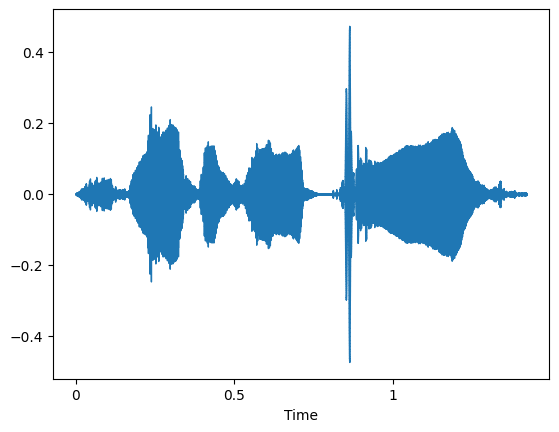

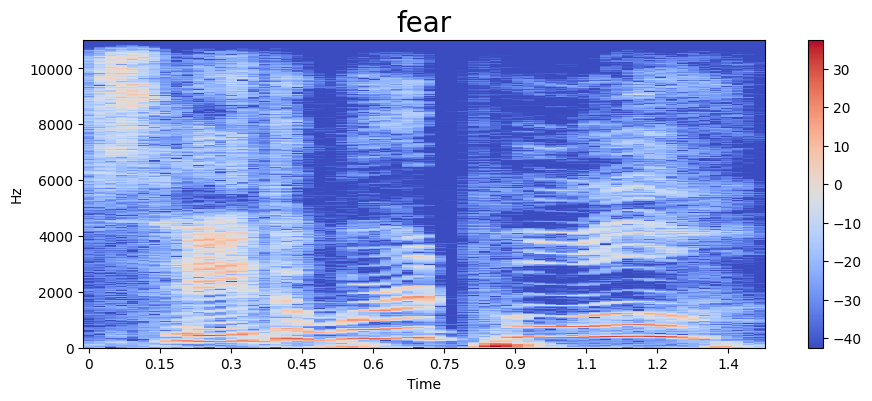

In [50]:
emotion = 'fear'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
librosa.display.waveshow(data, sr=sampling_rate)
spectogram(data, sampling_rate, emotion)
Audio(path)

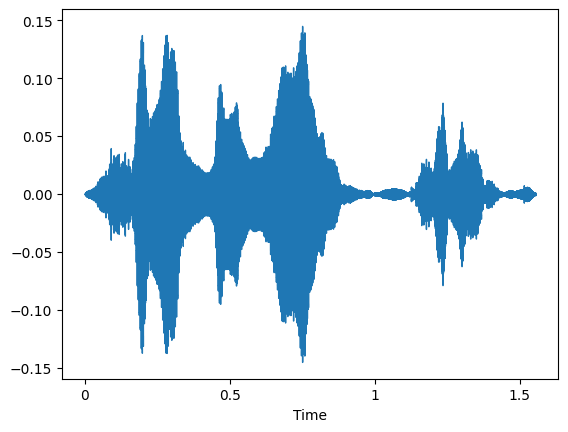

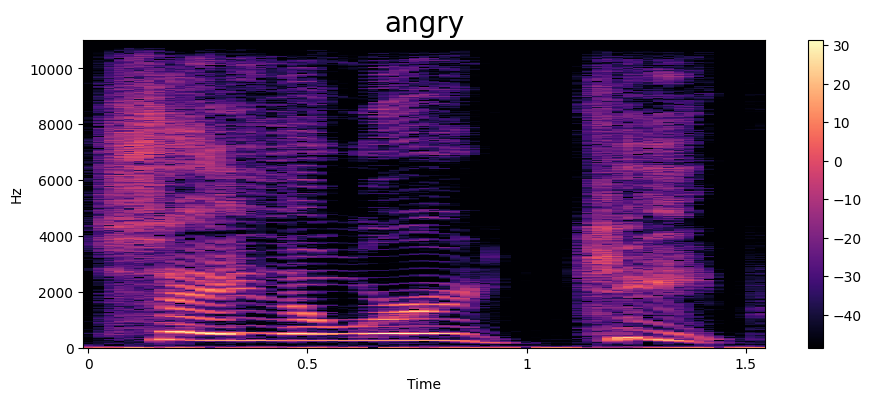

In [51]:
emotion = 'angry'
path = np.array(df['speech'][df['label']==emotion])[1]
data, sampling_rate = librosa.load(path)
librosa.display.waveshow(data, sr=sampling_rate)
spectogram(data, sampling_rate, emotion)
Audio(path)

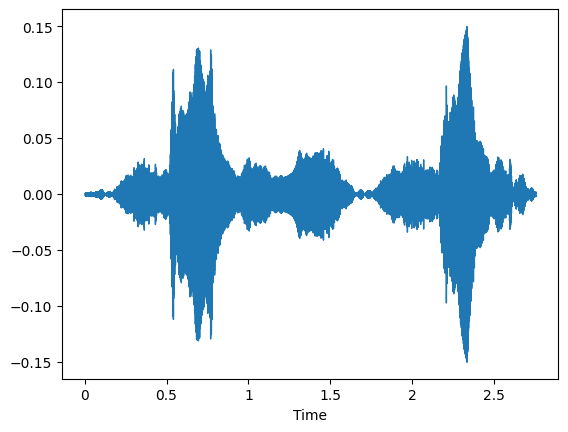

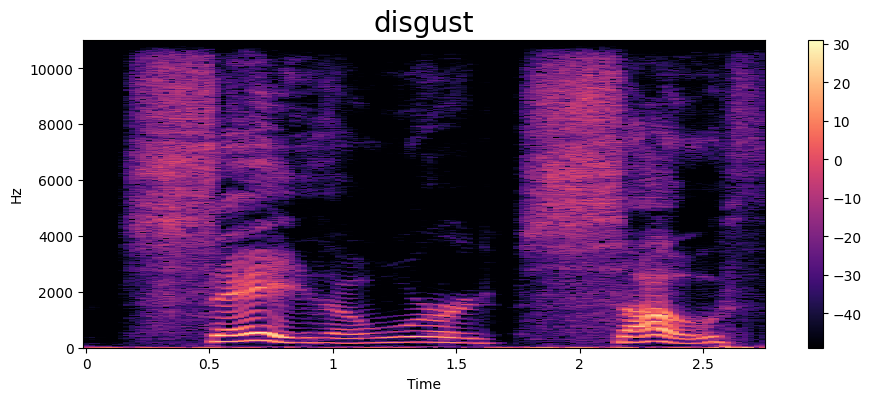

In [52]:
emotion = 'disgust'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
librosa.display.waveshow(data, sr=sampling_rate)
spectogram(data, sampling_rate, emotion)
Audio(path)

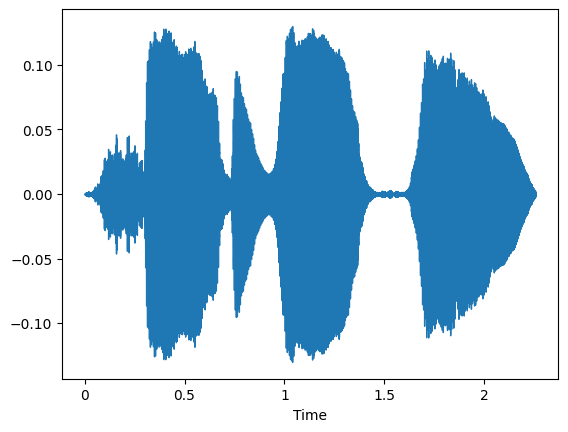

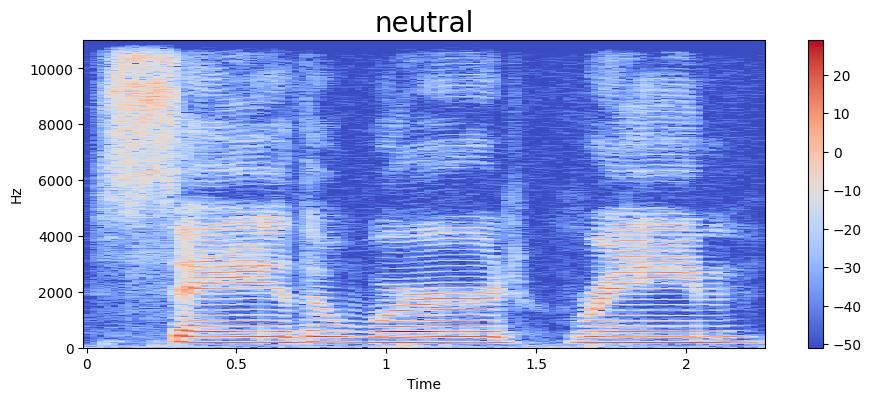

In [53]:
emotion = 'neutral'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
librosa.display.waveshow(data, sr=sampling_rate)
spectogram(data, sampling_rate, emotion)
Audio(path)

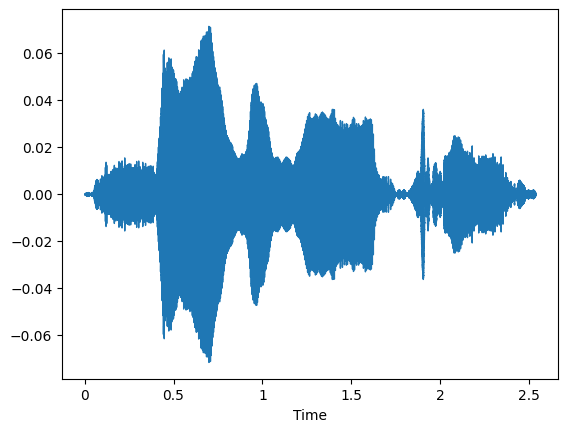

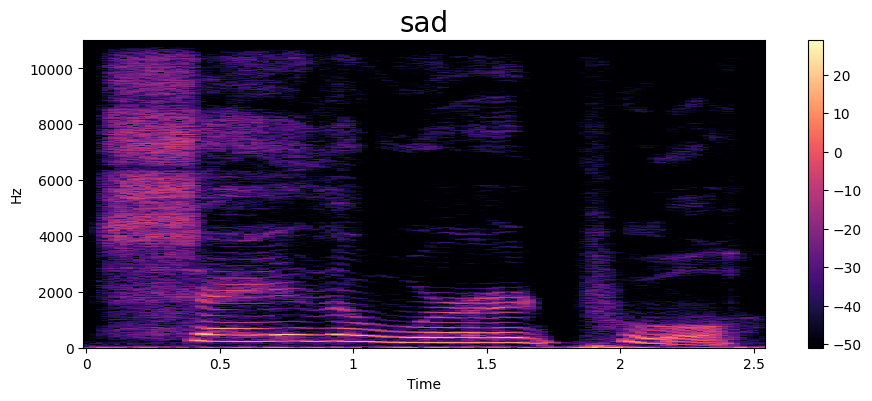

In [54]:
emotion = 'sad'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
librosa.display.waveshow(data, sr=sampling_rate)
spectogram(data, sampling_rate, emotion)
Audio(path)

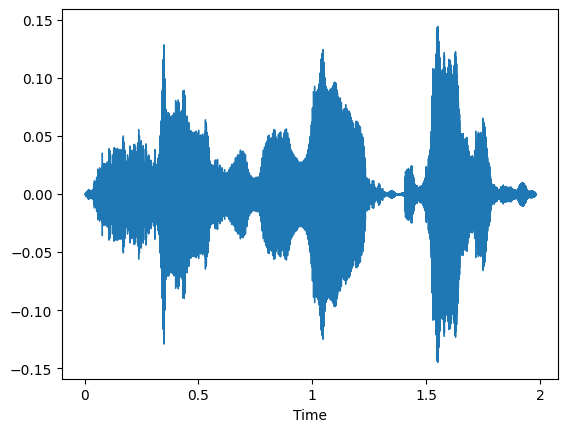

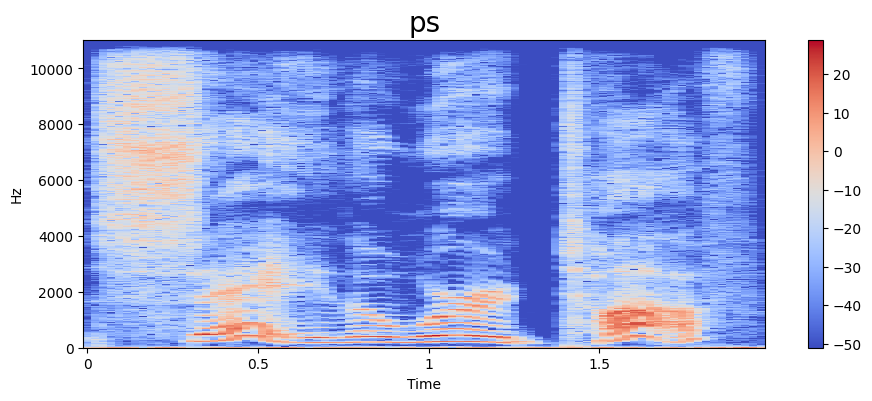

In [55]:
emotion = 'ps'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
librosa.display.waveshow(data, sr=sampling_rate)
spectogram(data, sampling_rate, emotion)
Audio(path)

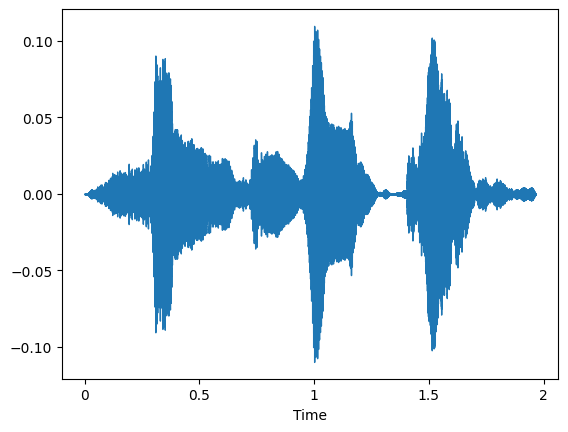

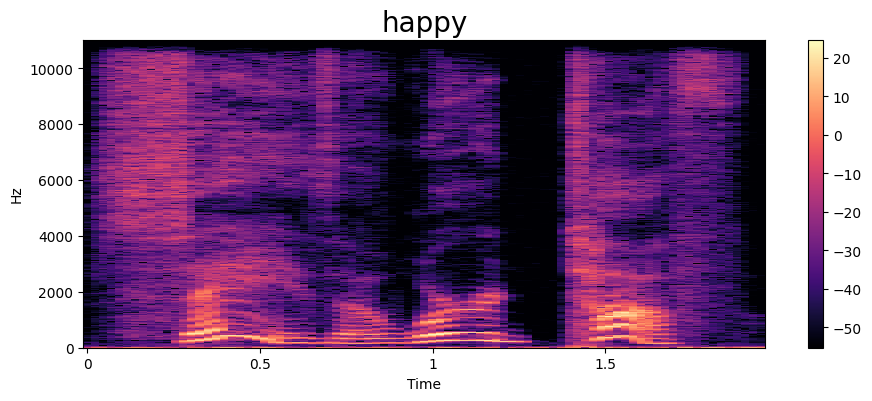

In [56]:
emotion = 'happy'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
librosa.display.waveshow(data, sr=sampling_rate)
spectogram(data, sampling_rate, emotion)
Audio(path)

Feature Extraction

In [57]:
def extract_mfcc(filename):
     y, sr = librosa.load(filename, duration=3, offset=0.5)
     mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
     return mfcc

In [58]:
extract_mfcc(df['speech'][0])

array([-4.1734192e+02,  1.0031620e+02, -3.9206097e+00, -2.0789249e+01,
        8.5499096e-01, -3.9201641e+00, -9.7336302e+00,  4.8305612e+00,
       -1.9077444e+01,  1.4821930e+00, -1.3830084e+01, -6.1327920e+00,
       -4.1199217e+00, -5.3071499e+00, -2.5578845e+00,  3.5311120e+00,
       -3.0356941e-01,  1.0171949e+01,  1.2279736e+00, -4.1968908e+00,
        4.0845041e+00,  1.8593837e+00, -4.0873013e+00,  1.8202952e+00,
       -3.5934820e+00,  3.5987697e+00, -5.8367033e+00,  4.5530987e+00,
       -2.5966029e+00,  5.7564344e+00,  5.0673742e+00,  1.0332119e+01,
        9.6563759e+00,  1.0339670e+01,  1.3640631e+01,  1.2951793e+01,
        1.1409487e+01,  1.3674974e+01,  5.6160307e+00,  6.9788127e+00],
      dtype=float32)

In [59]:
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))

In [60]:
X_mfcc

0       [-417.34192, 100.3162, -3.9206097, -20.78925, ...
1       [-437.6363, 74.10467, 15.492214, 13.882328, 13...
2       [-447.9639, 103.80152, 14.234629, -2.3483427, ...
3       [-449.5274, 94.146194, 11.507943, -2.2808812, ...
4       [-461.38272, 110.1098, 29.49636, -11.699106, -...
                              ...                        
2795    [-416.37088, 97.64125, -18.421093, 15.964129, ...
2796    [-423.44757, 71.99698, -8.733772, 24.984755, -...
2797    [-413.55768, 95.332115, -11.041016, 23.397612,...
2798    [-442.62018, 102.19836, 3.5005727, 36.877186, ...
2799    [-386.91437, 89.783516, -4.5497108, 30.935337,...
Name: speech, Length: 2800, dtype: object

In [61]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(2800, 40)

In [62]:
## input split
X = np.expand_dims(X, -1)
X.shape

(2800, 40, 1)

In [63]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])

In [64]:
y = y.toarray()

In [65]:
y.shape

(2800, 7)

Create the LSTM Model

In [66]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential([
    LSTM(256, return_sequences=False, input_shape=(40,1)),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 256)               264192    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 7)                 4

In [67]:
# Train the model
history = model.fit(X, y, validation_split=0.2, epochs=50, batch_size=64)

Epoch 1/50
35/35 [==============================] - 12s 214ms/step - loss: 1.1266 - accuracy: 0.5674 - val_loss: 3.1633 - val_accuracy: 0.0393
Epoch 2/50
35/35 [==============================] - 11s 306ms/step - loss: 0.3467 - accuracy: 0.8786 - val_loss: 2.9404 - val_accuracy: 0.0321
Epoch 3/50
35/35 [==============================] - 10s 285ms/step - loss: 0.2338 - accuracy: 0.9286 - val_loss: 3.6483 - val_accuracy: 0.0232
Epoch 4/50
35/35 [==============================] - 7s 211ms/step - loss: 0.1761 - accuracy: 0.9496 - val_loss: 3.4710 - val_accuracy: 0.1518
Epoch 5/50
35/35 [==============================] - 8s 217ms/step - loss: 0.1228 - accuracy: 0.9612 - val_loss: 2.6738 - val_accuracy: 0.3893
Epoch 6/50
35/35 [==============================] - 7s 205ms/step - loss: 0.1221 - accuracy: 0.9638 - val_loss: 2.6009 - val_accuracy: 0.3429
Epoch 7/50
35/35 [==============================] - 7s 199ms/step - loss: 0.0850 - accuracy: 0.9737 - val_loss: 2.5631 - val_accuracy: 0.4179
Epo

Plot the results

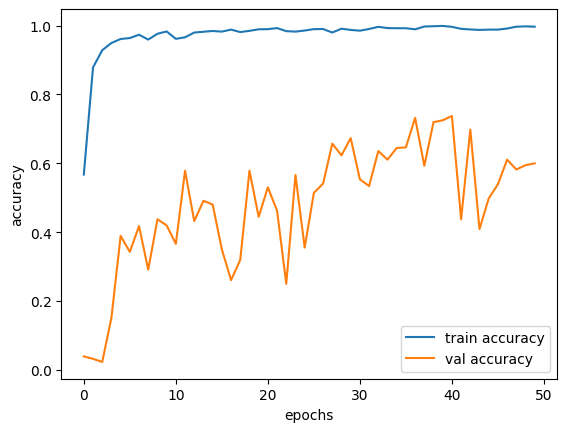

In [68]:
epochs = list(range(50))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

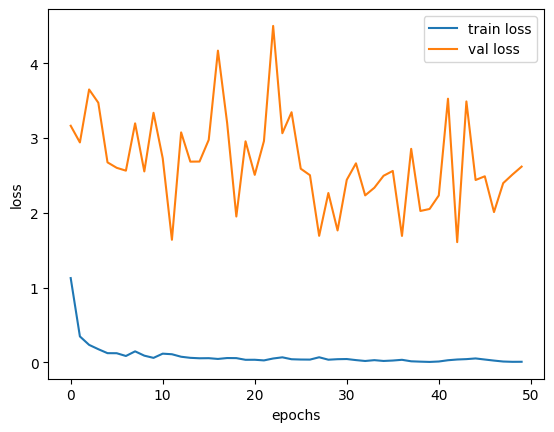

In [69]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

Save model

In [71]:
model.save('models/speech_recog_001.h5')